### AI3000: Reinforcement Learning

#### Assignment 3

#### Tanmay Goyal

#### AI20BTECH11021

##### Problem 1 : Importance Sampling

Consider a single state MDP with finite action space, $|\mathcal{A}| = K$. Consider $\gamma = 1$ and Horizon length  = 1. We collect action-reward pairs $(a,r)$ such that $a \sim \pi_b$, where $\pi_b$ is stochastic, and $r \sim R^a$ where $R^a(r)$ denote the unknown distribution of reward $r$, bounded in the range [0, 1]. We wish to estimate $V^\pi = \mathbb{E}_\pi[r | a \sim \pi]$ for target policy $\pi$.

a) Suppose there is only one sample $(a,r)$. Estimate $V^\pi$, and explain if its unbiased or not.

<u> Answer: </u>

We can write the value for $V^\pi$ as:

$V^\pi = \mathbb{E}_\pi(r) = \mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}r\right]$

This estimate will be unbiased.

b) Compute 

$\mathbb{E}_{\pi_b}\left[\frac{\pi(a|.)}{\pi_b(a|.)}\right]$

<u> Answer: </u>

$\mathbb{E}_{\pi_b}\left[\frac{\pi(a|.)}{\pi_b(a|.)}\right] = \sum\limits \pi_b(a | .) \times\frac{\pi(a|.)}{\pi_b(a|.)} =  \sum\limits \pi(a | .) = 1$

c)  If $\pi_b$ is a uniformly random policy and $\pi$ is deterministic, provide an expression for importance sampling ratio.

<u> Answer: </u>

IS ratio = 

$ \frac{\pi(a|.)}{\pi_b(a|.)} = \begin{cases}
\frac{1}{\frac{1}{K}} = K & a = \pi(s)\\
0 & \text{otherwise} 
\end{cases}$

d) Consider the reward to be $r$ for all actions. For a uniform behaviour policy $\pi_b$ and deterministic policy $\pi$, calculate the variance in $V^\pi$

<u> Answer: </u>

$Var[V^\pi] = Var\left[\frac{\pi(a|s)}{\pi_b(a|s)}r\right] = r^2 Var\left[\frac{\pi(a|s)}{\pi_b(a|s)}\right]$

$\implies Var[V^\pi] = r^2 \left[\mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}\right]^2 - \left[\mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}\right]\right]^2\right]$

$\implies Var[V^\pi] = r^2 \left[\mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}\right]^2 - 1\right]$ 

from part 2

$\implies Var[V^\pi] = r^2 \left[\mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}\right]^2 - 1\right]$ 

Since, $\pi_b$ is a uniform policy, $\pi_b(a|s) = \frac{1}{K}$. Also, from part 3, we have 

$\frac{\pi(a|s)}{\pi_b(a|s)} = \begin{cases}
K & \pi(s) = a\\
0 & \pi(s) \neq a
\end{cases}$

Thus, 

$\mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}\right]^2 = \sum\limits_{\pi(s) = a} \pi_b(a|s) \times  K^2 + \sum\limits_{\pi(s)\neq a} 0$

Thus, we get

$\implies Var[V^\pi] = r^2 (K - 1)$ 

e) Derive an upper bound for variance of $V^\pi$ when reward is bounded in [0,1].

<u> Answer </u>

$Var[V^\pi] = Var\left[\frac{\pi(a|s)}{\pi_b(a|s)}r\right] = \mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}r\right]^2 - \left[\mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}r\right]\right]^2$

$\implies Var[V^\pi] \leq \mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}r\right]^2 \leq \mathbb{E}_{\pi_b}\left[\frac{\pi(a|s)}{\pi_b(a|s)}\right]^2$

since the reward is bounded between 0 and 1

$\implies Var[V^\pi] \leq \sum\limits_{\pi(s) = a} \pi_b(a|s) \times  K^2 + \sum\limits_{\pi(s)\neq a} 0 = K$

f) Consider multi-step MDP. We assume $\mu(s_0)$ to be initial start-state distribution $(s_0 \sim \mu(s_0))$. Let $\tau$ denote a trajectory given by $(s_0 , a_0 , s_1 , qa_1 , \ldots s_t , a_t , \ldots)$ with actions $a_{0:\infty}\sim\pi_b$. Let $Q$ and $P$ be joint distributions over entire trajectory $\tau$ induced by $\pi_b$ and $\pi$. Provide an expression for $\frac{P(\tau)}{Q(\tau)}$

<u> Answer </u>

We have, 

$\frac{P(\tau)}{Q(\tau)} = \frac{\mu(s_0)\pi_b(a_0|s_0)\mathbb{P}(s_1 | s_0 , a_0)\pi_b(a_1 | s_1) \mathbb{P}(a_2|s_1,a_1)\ldots}{\mu(s_0)\pi(a_0|s_0)\mathbb{P}(s_1 | s_0 , a_0)\pi(a_1 | s_1) \mathbb{P}(a_2|s_1,a_1)\ldots}$

$\implies \frac{P(\tau)}{Q(\tau)} = \frac{\mu(s_0)\prod\limits_{i=0}^\infty \pi_b(a_i|s_i)\mathbb{P}(s_{i+1} | s_i,a_i)}{\mu(s_0)\prod\limits_{i=0}^\infty \pi(a_i|s_i)\mathbb{P}(s_{i+1} | s_i,a_i)} = \prod\limits_{i=0}^\infty \frac{\pi_b(a_i|s_i)}{\pi(a_i|s_i)}$

##### Problem 2: Game of Tic-Tac-Toe

In [197]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [198]:
class tic_tac_toe():
    
    agent = 'X'
    opponent = 'O'

    def __init__(self):
        self.board = [['_' for i in range(3)]for i in range(3)]
        self.tuple_board = tuple([tuple(i) for i in self.board]) # making board hashable
        self.full_agent = []
        self.full_opponent = []
        self.empty = [i for i in range(9)]
        self.q_table = {self.tuple_board: np.array([0.0 for i in range(9)])}
    
    def tupling_board(self):
        # conversion from unhashable list to hashable tuple
        return tuple([tuple(i) for i in self.board])

    def act(self , action , player):
        # check for validity of action taken
        if action in self.empty:
            if player == "opponent":
                self.board[action//3][action%3] = self.opponent
                self.full_opponent.append(action)
            else:
                self.board[action//3][action%3] = self.agent
                self.full_agent.append(action)
            
            self.empty.remove(action)
            return action
        
        else:
            return
    
    def print_board(self):
        print(self.board)

    def game_end(self):
        return len(self.empty) == 0

    def random_agent(self):
        a = random.randint(0 , len(self.empty)-1)
        return self.empty[a]

    def safe_agent(self):
        # winning/ blocking moves
        a = -1
        if (1 in self.full_agent and 2 in self.full_agent) or (3 in self.full_agent and 6 in self.full_agent) or (4 in self.full_agent and 8 in self.full_agent):
            a = 0
        elif (0 in self.full_agent and 2 in self.full_agent) or (4 in self.full_agent and 7 in self.full_agent):
            a = 1
        elif (0 in self.full_agent and 1 in self.full_agent) or (5 in self.full_agent and 8 in self.full_agent) or (4 in self.full_agent and 6 in self.full_agent):
            a = 2
        elif (0 in self.full_agent and 6 in self.full_agent) or (4 in self.full_agent and 5 in self.full_agent):
            a = 3
        elif (1 in self.full_agent and 7 in self.full_agent) or (3 in self.full_agent and 5 in self.full_agent) or (0 in self.full_agent and 8 in self.full_agent) or (2 in self.full_agent and 6 in self.full_agent):
            a = 4
        elif (3 in self.full_agent and 4 in self.full_agent) or (2 in self.full_agent and 8 in self.full_agent):
            a = 5
        elif (0 in self.full_agent and 3 in self.full_agent) or (7 in self.full_agent and 8 in self.full_agent) or (2 in self.full_agent and 4 in self.full_agent):
            a = 6
        elif (6 in self.full_agent and 8 in self.full_agent) or (1 in self.full_agent and 4 in self.full_agent):
            a = 7
        elif (0 in self.full_agent and 4 in self.full_agent) or (6 in self.full_agent and 7 in self.full_agent) or (2 in self.full_agent and 5 in self.full_agent):
            a = 8
        if a < 0 : # if winning move not found
            if (1 in self.full_opponent and 2 in self.full_opponent) or (3 in self.full_opponent and 6 in self.full_opponent) or (4 in self.full_opponent and 8 in self.full_opponent):
                a = 0
            elif (0 in self.full_opponent and 2 in self.full_opponent) or (4 in self.full_opponent and 7 in self.full_opponent):
                a = 1
            elif (0 in self.full_opponent and 1 in self.full_opponent) or (5 in self.full_opponent and 8 in self.full_opponent) or (4 in self.full_opponent and 6 in self.full_opponent):
                a = 2
            elif (0 in self.full_opponent and 6 in self.full_opponent) or (4 in self.full_opponent and 5 in self.full_opponent):
                a = 3
            elif (1 in self.full_opponent and 7 in self.full_opponent) or (3 in self.full_opponent and 5 in self.full_opponent) or (0 in self.full_opponent and 8 in self.full_opponent) or (2 in self.full_opponent and 6 in self.full_opponent):
                a = 4
            elif (3 in self.full_opponent and 4 in self.full_opponent) or (2 in self.full_opponent and 8 in self.full_opponent):
                a = 5
            elif (0 in self.full_opponent and 3 in self.full_opponent) or (7 in self.full_opponent and 8 in self.full_opponent) or (2 in self.full_opponent and 4 in self.full_opponent):
                a = 6
            elif (6 in self.full_opponent and 8 in self.full_opponent) or (1 in self.full_opponent and 4 in self.full_opponent):
                a = 7
            elif (0 in self.full_opponent and 4 in self.full_opponent) or (6 in self.full_opponent and 7 in self.full_opponent) or (2 in self.full_opponent and 5 in self.full_opponent):
                a = 8
        
        if a < 0:
            a = random.randint(0 , len(self.empty)-1)
            return self.empty[a]
        else:
            return a

    def win_game(self , player):
        board_transpose = [[self.board[i][j] for i in range(3)] for j in range(3)]
        if player == 'opponent':
            if ['O' , 'O' , 'O'] in self.board:
                return True
            elif ['O' , 'O' , 'O'] in board_transpose:
                return True
            elif (0 in self.full_opponent and 4 in self.full_opponent and 8 in self.full_opponent) or (2 in self.full_opponent and 4 in self.full_opponent and 6 in self.full_opponent):            
                return True
            else:
                 return False

        else:
            if ['X' , 'X' , 'X'] in self.board:
                return True
            elif ['X' , 'X' , 'X'] in board_transpose:
                return True
            elif (0 in self.full_agent and 4 in self.full_agent and 8 in self.full_agent) or (2 in self.full_agent and 4 in self.full_agent and 6 in self.full_agent):
                return True
            else:
                 return False

    def update(self , original_state , action , reward , alpha , gamma):
        self.q_table[original_state][action] = (1-alpha) * self.q_table[original_state][action] + alpha * (reward + gamma * np.argmax(self.q_table[self.tupling_board()]))
        return

    def reset_game(self):
        self.board = [['_' for i in range(3)]for i in range(3)]
        self.full_agent= []
        self.full_opponent = []
        self.empty = [i for i in range(9)]

In [199]:
def play_opp(game , player , alpha = 0 , gamma = 0 , update = True):
    t_board = tuple([tuple(i) for i in game.board])
    if player == 'random':
        a = game.act(game.random_agent() , 'opponent')
    elif player == "choose":
        s = random.randint(0,1)
        if s == 0:
            a = game.act(game.safe_agent() , 'opponent')
        else:
            a = game.act(game.random_agent() , 'opponent')
    else:
        a = game.act(game.safe_agent() , 'opponent')

    if game.tupling_board() not in game.q_table.keys():
        game.q_table[game.tupling_board()] = np.array([0.0 for i in range(9)])
    
    if game.win_game("opponent"):
        r = -1
    # elif game.game_end():
    #     r = 0.5
    else:
        r = 0
    
    # update
    if update:
        game.update(t_board , a , r , alpha , gamma)


In [200]:
def play_agent(game, alpha = 0 , gamma = 0 , update = True):
    # original board
    t_board = tuple([tuple(i) for i in game.board])
    sorted = np.argsort(game.q_table[game.tupling_board()])
    for i in range(len(sorted)):
        a = game.act(sorted[i] , "agent")
        if a is not None:
            break
        
    if game.tupling_board() not in game.q_table.keys():
        game.q_table[game.tupling_board()] = np.array([0.0 for i in range(9)])
        
    if game.win_game("agent"):
        r = 1
    # elif game.game_end():
    #     r = 0.5
    else:
        r = 0
    
    # update
    if update:
        game.update(t_board , a , r , alpha , gamma)

In [201]:
def train(player , test_against , alpha , gamma):
    game = tic_tac_toe()
    agent_wins = []

    for n_game in range(10000):
        start = random.randint(0,1)
        done = False
        
        if start == 0:
            while not done:
                
                play_opp(game , player , alpha , gamma , True)
                if game.win_game("opponent"):
                    done = True
                if game.game_end():
                    done = True

                if not done:
                    play_agent(game , alpha , gamma , True)
                    if game.win_game("Agent"):
                        done = True
                    if game.game_end():
                        done = True

            game.reset_game()    

            if n_game % 200 == 0 and n_game != 10000:
                if test_against == "safe":
                    agent_wins.append(test(game, "safe" , 100)[0])
                else:
                    agent_wins.append(test(game, "random" , 100)[0])

        else:
            while not done:
                
                play_agent(game , alpha , gamma , True)
                if game.win_game("Agent"):
                    done = True
                if game.game_end():
                    done = True

                if not done:
                    play_opp(game , player , alpha , gamma , True)
                    if game.win_game("opponent"):
                        done = True
                    if game.game_end():
                        done = True
                    
            game.reset_game()

            if n_game % 200 == 0 and n_game != 10000:
                if test_against == "safe":
                    agent_wins.append(test(game, "safe" , 100)[0])
                else:
                    agent_wins.append(test(game, "random" , 100)[0])


    if test_against == "safe":
        win,draw = test(game, "safe" , 1000)
        agent_wins.append(win/10)
        print("Number of games won = {}".format(win))
        print("Number of games drawn = {}".format(draw))
        print("Number of games lost = {}".format(1000 - win - draw))
    else:
        win,draw = test(game, "random" , 1000)
        agent_wins.append(win/10)
        print("Number of games won = {}".format(win))
        print("Number of games drawn = {}".format(draw))
        print("Number of games lost = {}".format(1000 - win - draw)) 
        
    # percentage of games won
    
    return agent_wins


In [202]:
# since testing is done against both
def test(game , player , n_tests = 100):
    agent_wins = 0
    draws = 0
    game.reset_game()
    
    for n_game in range(n_tests):
        start = random.randint(0,1)
        done = False
        
        if start == 0:
            while not done:
                if player == "random":
                    play_opp(game , "random" , 0 ,0 , False)
                else:
                    play_opp(game , "safe" , 0 ,0 , False)
                if game.win_game("opponent"):
                    done = True
                if game.game_end():
                    done = True

                if not done:
                    play_agent(game , 0 ,0 , False)
                    if game.win_game("Agent"):
                        done = True
                        agent_wins += 1
                    if game.game_end():
                        done = True
                        draws += 1

            game.reset_game()    

        else:
            while not done:
                
                play_agent(game , 0 ,0 , False)
                if game.win_game("Agent"):
                    agent_wins += 1
                    done = True
                if game.game_end():
                    done = True

                if not done:
                    if player == "random":
                        play_opp(game , "random" , 0 ,0 , False)
                    else:
                        play_opp(game , "safe" , 0 ,0 , False)
                    if game.win_game("opponent"):
                        done = True
                    if game.game_end():
                        done = True
                        draws += 1
                    
            game.reset_game() 

    return agent_wins , draws

Number of games won = 406
Number of games drawn = 0
Number of games lost = 594


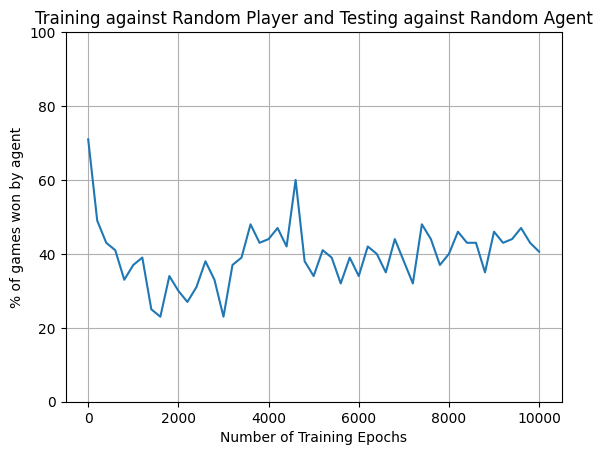

In [203]:
indices = [200 * i for i in range(51)]
ran = train("random", "random", 0.7 , 0.5)
plt.plot(indices , ran)
plt.grid(True)
plt.ylim(0,100)
plt.title("Training against Random Player and Testing against Random Agent")
plt.xlabel("Number of Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

Number of games won = 678
Number of games drawn = 223
Number of games lost = 99


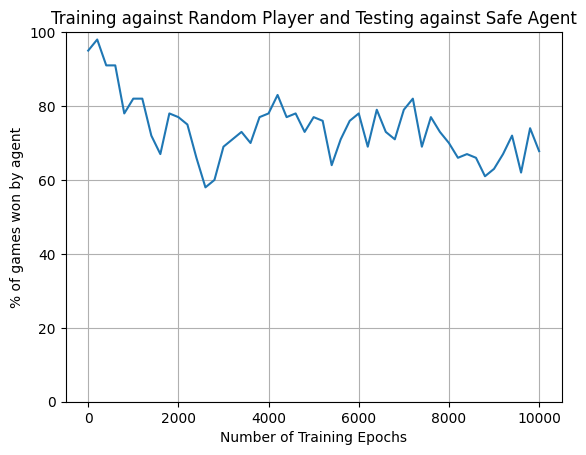

In [204]:
indices = [200 * i for i in range(51)]
ran = train("random", "safe", 0.7 , 0.5)
plt.plot(indices , ran)
plt.ylim(0,100)
plt.grid(True)
plt.title("Training against Random Player and Testing against Safe Agent")
plt.xlabel("Number of Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

Number of games won = 556
Number of games drawn = 0
Number of games lost = 444


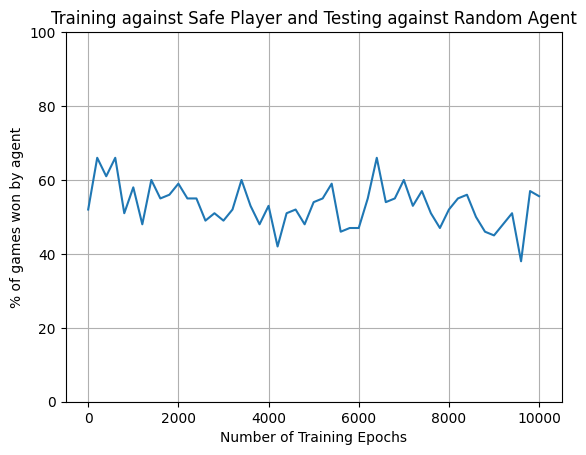

In [205]:
ran = train("safe", "random", 0.7 , 0.1)
plt.plot(indices , ran)
plt.ylim(0,100)
plt.grid(True)
plt.title("Training against Safe Player and Testing against Random Agent")
plt.xlabel("Number of Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

Number of games won = 462
Number of games drawn = 152
Number of games lost = 386


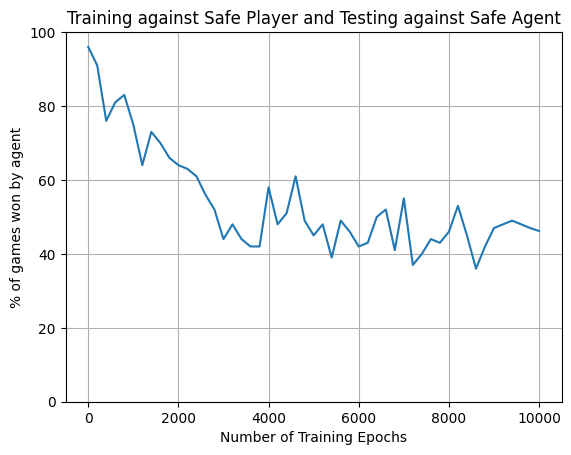

In [206]:
ran = train("safe", "safe" , 0.7 , 0.1)
plt.plot(indices , ran)
plt.grid(True)
plt.ylim(0,100)
plt.title("Training against Safe Player and Testing against Safe Agent")
plt.xlabel("Number of Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

Number of games won = 435
Number of games drawn = 0
Number of games lost = 565


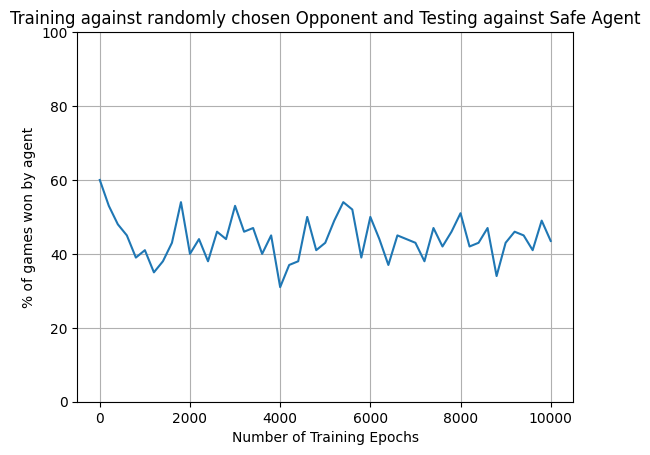

In [207]:
ran = train("choose", "random", 0.7 , 0.5)
plt.plot(indices , ran)
plt.ylim(0,100)
plt.grid(True)
plt.title("Training against randomly chosen Opponent and Testing against Safe Agent")
plt.xlabel("Number of Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

Number of games won = 728
Number of games drawn = 79
Number of games lost = 193


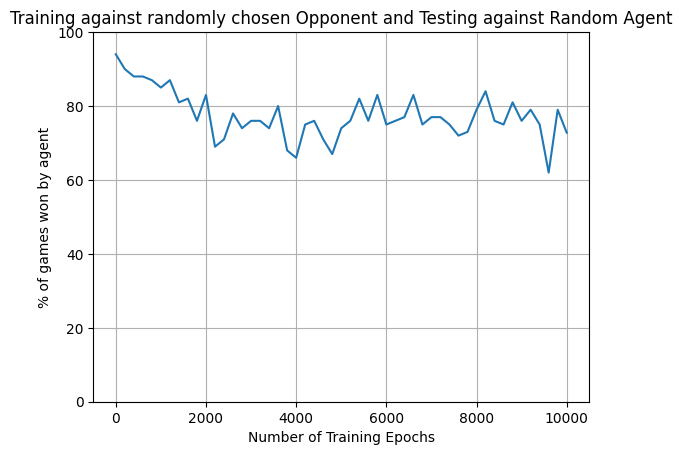

In [208]:
ran = train("choose", "safe", 0.7 , 0.5)
plt.plot(indices , ran)
plt.grid(True)
plt.ylim(0,100)
plt.title("Training against randomly chosen Opponent and Testing against Random Agent")
plt.xlabel("Number of Training Epochs")
plt.ylabel("% of games won by agent")
plt.show()

(d) Which agent is the best?

<u> Answer </u>

The second agent should be the best becuase it is training against the safest player, which will win/block if there is an available move, else it will play randomly. The third agent is choosing randomly if it is a safe agent or a random agent. This means that even if there is a blocking/winning move possible, it might choose to act randomly. Thus, training against the toughest opponent, should result in the best agent.

e) Is the Q-learning agent developed unbeatable? If not, suggest ways to improve the training process.

<u> Answer: </u>

No the agent is not unbeatable. One way to improve is use human knowledge in the training as well. For example, putting your first move in a corner box improves the chances of winning. Another way could be to increase the number of training rounds, or allow more exploration.